# FFT

A gyors Fourier transzformáció (FFT) a diszkrét Fourier transzformáció (DFT) számítására alkalmazott hatékony numerikus eljárás. A DFT az alábbi összefüggés kiszámítását jelenti:

$$F\left(\frac{n}{N}\right) = \sum_{k=0}^{N-1} f(k) e^{-i 2 \pi k \frac{n}{N} }$$

* $F(\frac{n}{N})$ a DFT eredménye $\frac{n}{N}$ ciklus/minta frekvenciára.
* a frekvenciát 0 tól (minták száma/2)-ig használjuk fel

## Teszt függvény mintavételezése

Hullám alakunk:

* frekvencia: 1 Hz
* amplitúdó: 5

Mintavételezzük:

* 10 minta/másodperc
* 3 másodperc időtartam
* összesen 30 minta

In [1]:
from __future__ import unicode_literals
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# segédfüggvény a rajzoláshoz:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


In [2]:
mps  = 10 # minta / másodperc
tmax = 3  # teljes idő
num_s = mps * tmax  # minták száma

t = np.linspace(0, tmax, num_s)

# x = 0 és x = 1 között egy teljes periódus (2 pi) van, tehát ez egy 1 Hz -es jel 5 amplitúdóval
f_hz = 1.0
#f_hz = 1.7
ampl = 5
f = lambda x: ampl * np.sin(f_hz * 2*np.pi*x)
    
s_f = [f(i) for i in t]  # mintavételezett f

<Container object of 3 artists>

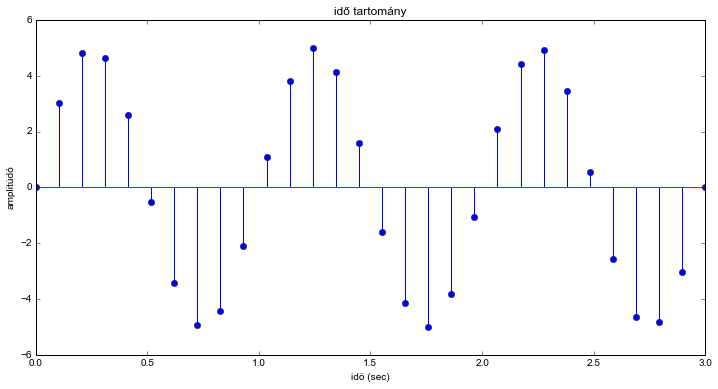

In [3]:
setup_graph(title='idő tartomány', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
#print t, s_f
plt.stem(t, s_f)

## FFT számítása

A számítást a NumPy eljárása segítségével végezzük. Ez az eljárás a következő transzformációt számítja ki:
$$ y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n] \, $$

In [5]:
fft_f = np.fft.fft(s_f)

Felrajzoljuk a transzformált valós és képzetes részét (spektrum):

<Container object of 3 artists>

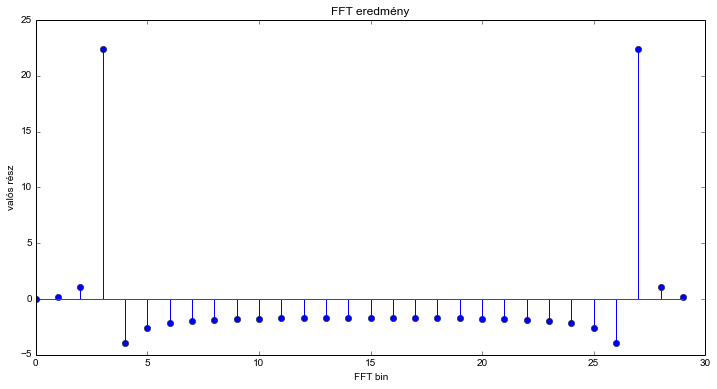

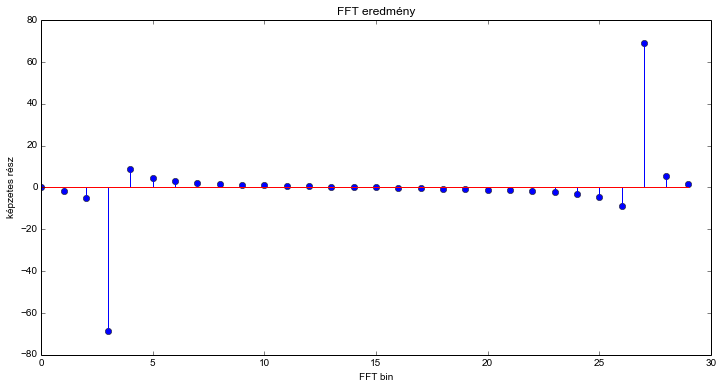

In [6]:
x= np.r_[0:30:1]
plt.figure()
setup_graph(title='FFT eredmény', x_label='FFT bin', y_label='valós rész', fig_size=(12,6))
plt.stem(x,fft_f.real)
plt.figure()
setup_graph(title='FFT eredmény', x_label='FFT bin', y_label='képzetes rész', fig_size=(12,6))
plt.stem(x,np.imag(fft_f),'b-')


### Miért szimmetrikus?

Azért, mert valós $f(t)$ függvény (bemenő jel) esetén a transzformált második fele mindig az első tükörképe lesz. 

A kiszámított értékek a következő sorrendet követik: Ha `A = fft(a, n)`, akkor `A[0]` tartalmazza a zérus frekvenciájú összetevőt (a jel átlagát), ami mindig valós értékű valós jel esetén. `A[1:n/2]` tartalmazza a pozitív frekvenciájú tagokat, és `A[n/2+1:]` a negatív frekvenciájúakat, a csökkenő negatív frekvenciákra. Páros számú adat esetében `A[n/2]` tartalmazza mind a pozitív, mind a negatív Nyquist frekvenciájú tagot, ami mindig valós értékű valós bemenő jel esetén. Páratlan számú adat esetében `A[(n-1)/2]`-ben van a legnagyobb pozitív frekvenciájú tag, és `A[(n+1)/2]`-ben a legnagyobb negatív frekvenciájú tag. Az `np.fft.fftshift(A)` függvény eltolja a transzformált eredmény vektort olymódon, hogy a zérus frekvenciát középre helyezi el, illetve `np.fft.ifftshift(A)` végzi el ennek fordítottját.

Általában mindig valós függvényekkel dolgozunk, ezért használhatjuk a transzformáció valós változatát: `np.fft.rfft()`

/usr/local/lib/python2.7/dist-packages/numpy-1.11.0b3-py2.7-linux-x86_64.egg/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Container object of 3 artists>

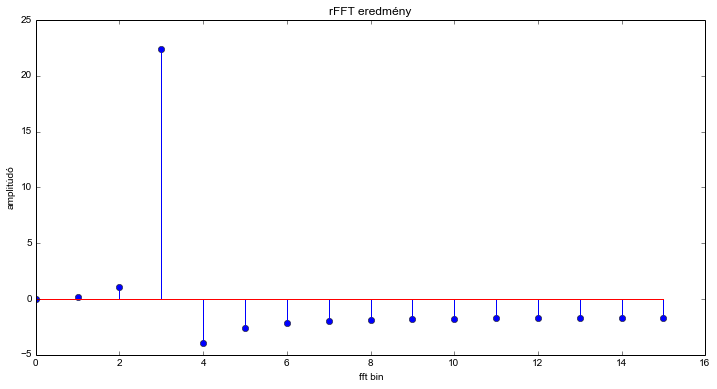

In [7]:
rfft_f = np.fft.rfft(s_f)
setup_graph(title='rFFT eredmény', x_label='fft bin', y_label='amplitúdó', fig_size=(12,6))
plt.stem(rfft_f)

### A frekvencia tengely átskálázása

Az fft bin helyett a vízszintes tengelyt frekvencia egységben skálázzuk.


In [8]:
rf = [(i*1.0/num_s)*mps for i in range(num_s/2+1)]
# látszik, hogy most már a frekvencia 0-tól 5 Hz-ig változik
rf

[0.0,
 0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666665,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0,
 3.333333333333333,
 3.6666666666666665,
 4.0,
 4.333333333333334,
 4.666666666666667,
 5.0]

<Container object of 3 artists>

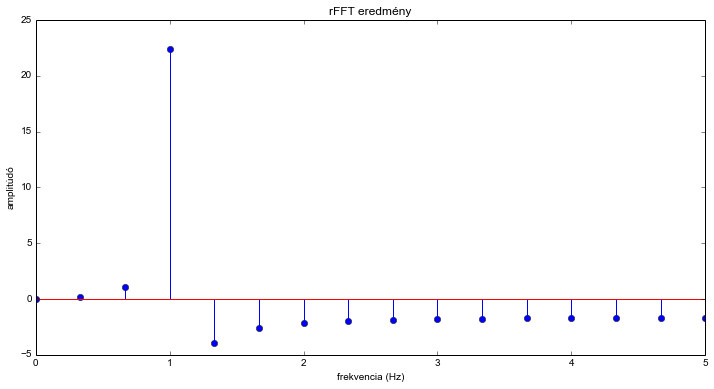

In [9]:
setup_graph(title='rFFT eredmény', x_label='frekvencia (Hz)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(rf, rfft_f)

### Az értékek skálázása

Negatív értékeink is vannak, és az amplitúdó nem 5.

Az összetevők nagysága (magnitúdó):

$$mag(i) = \frac{\sqrt{\Re(i)^2 + \Im(i)^2}}{N}$$

Az `A` transzformált magnitúdúját az `np.abs(A)`-val is kiszámíthatjuk.

<Container object of 3 artists>

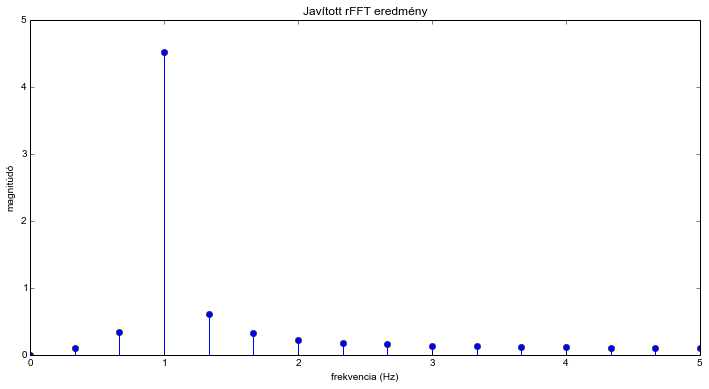

In [10]:
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(rfft_f) for i in rfft_f]

setup_graph(title='Javított rFFT eredmény', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.stem(rf, rfft_mag)

A transzformált komplex `A` mennyiség fázisszögét az `np.angle(A)` függvénnyel számíthatjuk ki:

<Container object of 3 artists>

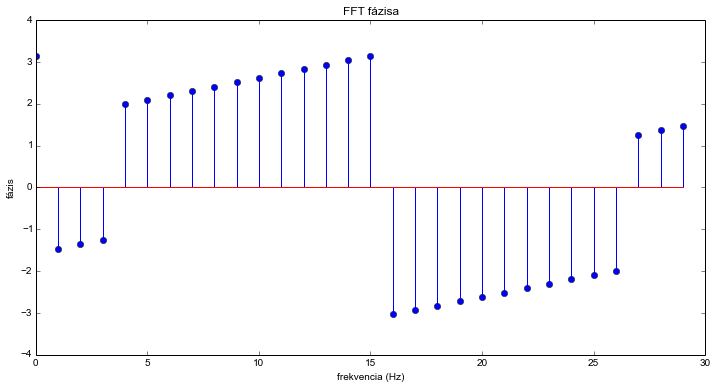

In [12]:
fft_phase = np.angle(fft_f)
setup_graph(title='FFT fázisa', x_label='frekvencia (Hz)', y_label='fázis', fig_size=(12,6))
plt.stem(x, fft_phase)

### Miért nem kaptuk vissza pontosan az 1 Hz-es szinusz jelet?

* Nem lenne pontos az FFT? - Számoljuk ki az inverzet és vessük össze az eredetivel!

## Inverz FFT

A kiszámított FFT eredményből inverz FFT-vel visszakaphatjuk az eredeti hullámot (az inverz valós FFT-vel - `irfft`).

Az inverz transzformáció számítása az alábbi összefüggés szerint történik:
$$x[n] = \frac{1}{N} \sum_{n=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k] \, .$$

<Container object of 3 artists>

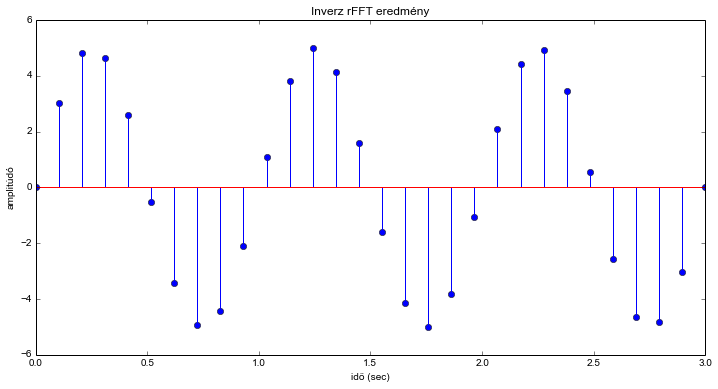

In [13]:
irfft_f = np.fft.irfft(rfft_f)

setup_graph(title='Inverz rFFT eredmény', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(t, irfft_f)

Van-e különbség az eredeti és visszatranszformált értékek között?

<Container object of 3 artists>

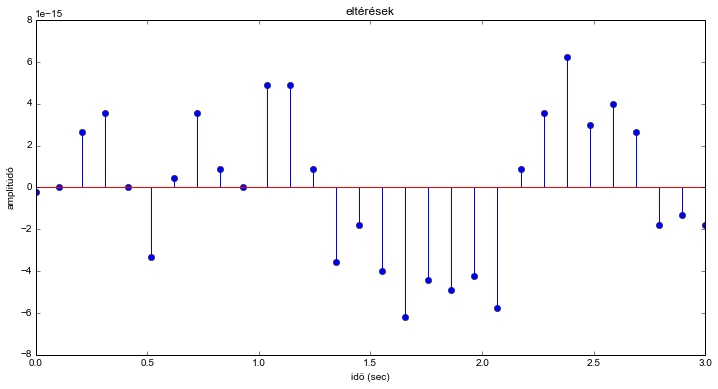

In [14]:
setup_graph(title='eltérések', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(t, irfft_f-s_f)

A kerekítési eltérésektől eltekintve visszakaptuk az eredeti szinuszjelet - tehát nem az FFT az oka az eltéréseknek.

## Spektrális szivárgás (leakage)

A véges hosszúságú minta miatt a jel energiája átvándorol a környező frekvenciákra. Ennek a hatását levágó ablak (taper) alkalmazásával csökkenthetjük.